# Scikit Learn Tutorial #14 - Machine Learning Process
![Scikit Learn Logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Loading in Dataset

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols','flavanoids', 'nonflavanoid_phenols' ,'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline'], delimiter=",", index_col=False)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


## Exploring data

In [2]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000


In [3]:
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64

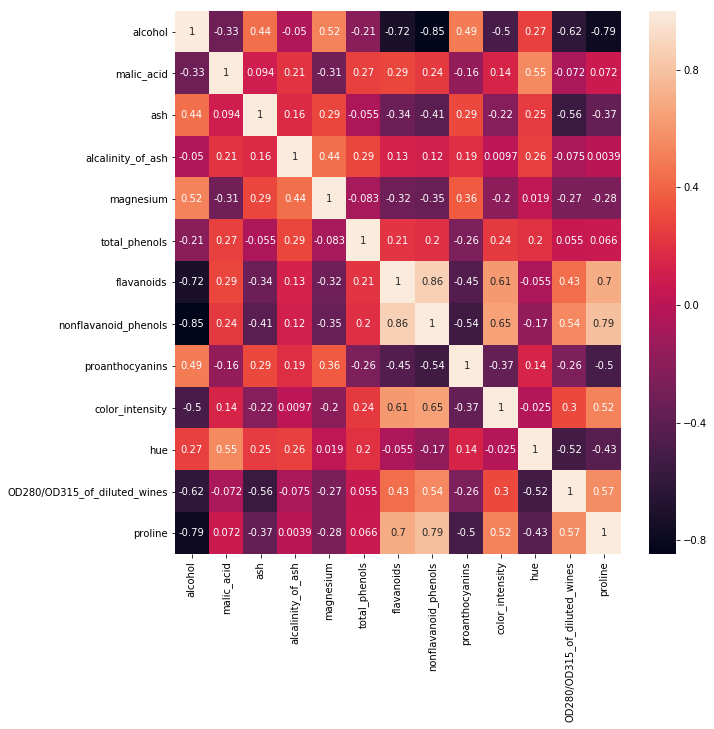

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True, ax=ax)

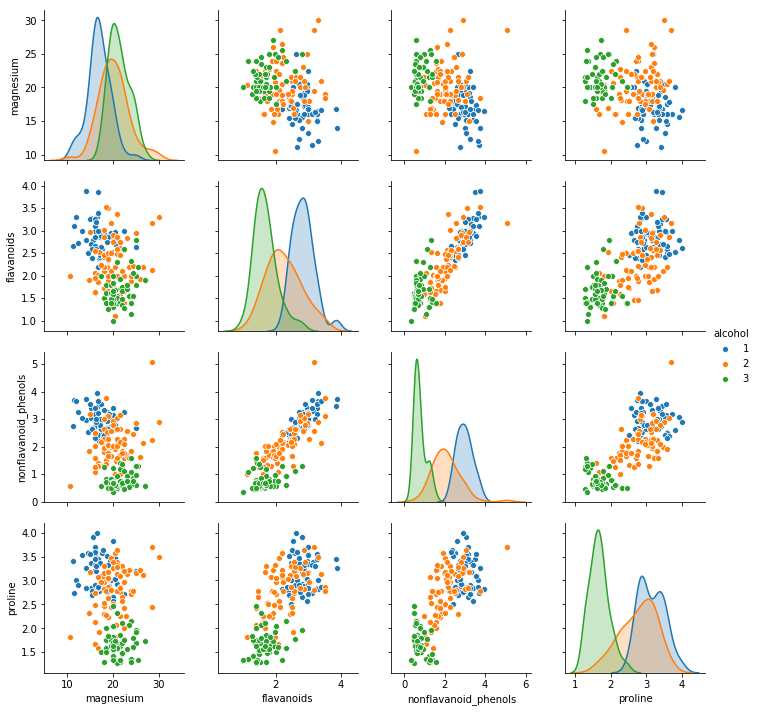

In [5]:
sns.pairplot(wine, vars=['magnesium', 'flavanoids', 'nonflavanoid_phenols', 'proline'], hue='alcohol')

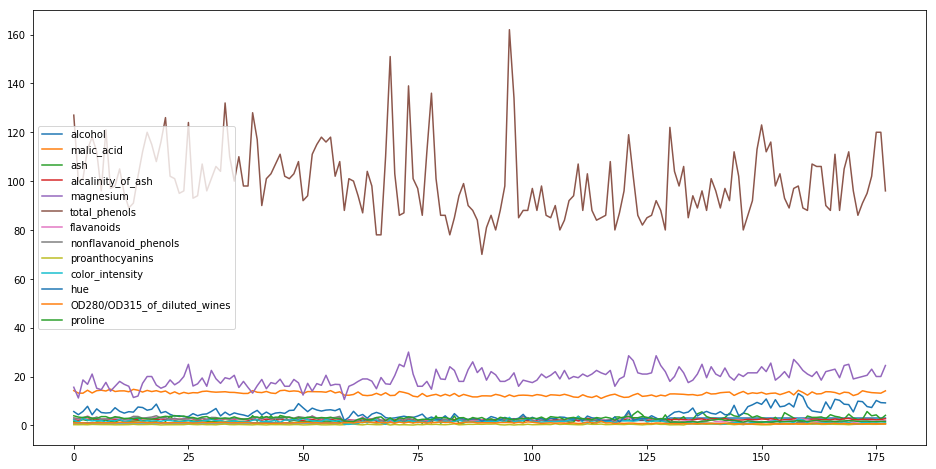

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
for column in wine:
    ax.plot(wine[column], label=column)
plt.legend()

## Preprocessing

In [7]:
from sklearn.model_selection import train_test_split


X = np.array(wine.drop(['alcohol'], axis=1))
y= np.array(wine['alcohol'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Model

In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

models = [
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('AB', AdaBoostClassifier()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier()),
]

In [10]:
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(name, accuracy)

SVM 0.9444444444444444
KNN 0.9166666666666666
AB 1.0
RF 0.9722222222222222
GB 0.9444444444444444


## Improve Results

In [11]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [5, 10, 50, 100], 'learning_rate': [0.1, 1, 10]}

clf = RandomizedSearchCV(AdaBoostClassifier(), parameters)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.best_params_)

1.0
{'n_estimators': 100, 'learning_rate': 1}


## Resources

<ul>
    <li><a href="https://machinelearningmastery.com/process-for-working-through-machine-learning-problems/">Applied Machine Learning Process (MachineLearningMastery)</a></li>
    <li><a href="http://scikit-learn.org/stable/">Scikit Learn Documentation</a></li>
    <li><a href="http://www.numpy.org/">Numpy Documentation</a></li>
    <li><a href="https://pandas.pydata.org/">Pandas Documentation</a></li>
    <li><a href="https://matplotlib.org/">Matplotlib Documentation</a></li>
    <li><a href="https://seaborn.pydata.org/">Seaborn Documentation</a></li>
</ul>

## Conclusion

That was a overview of my process of working through a Machine Learning problem and also probably the last video of this tutorial series.
I hope you liked this tutorial if you did consider subscribing on my <a href="https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA">Youtube Channel</a> or following me on Social Media. If you have any question feel free to contact me.